In [1]:
from __future__ import print_function, division, absolute_import
import os,sys
import numpy as np
from scipy.linalg import inv, block_diag
import time
from joblib import Parallel, delayed
import gudhi
sys.path.insert(0, "C:\\Users\\matt\\Desktop\\orbithunter\\")
from orbithunter import *
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'gudhi'

In [237]:
def orbit_persistence(orbit, dimension_list, periodic_dimensions=[True, True]):
    
    tile_field = tile_Orbit.state.ravel()
    tile_pcc = gudhi.PeriodicCubicalComplex(dimensions=dimension_list,
                                            top_dimensional_cells=tile_field,
                                            periodic_dimensions=periodic_dimensions)
    
    tile_persistence_ = tile_pcc.persistence(min_persistence=0.1)
    _ = gudhi.plot_persistence_diagram(tile_persistence_, legend=True)
    return tile_persistence_

In [166]:
filename =  "C:\\Users\\matth\\Desktop\\rpo_L13p02_T15.h5"
merger_Orbit = read_h5(filename)
merger_Orbit = rediscretize(merger_Orbit, new_N=32, new_M=32)
comoving_field = merger_Orbit.convert(to='field').state
field = merger_Orbit.convert(to='field').to_fundamental_domain().state

[(2, (2.635860490993602, inf)),
 (1, (-0.2952660107429462, inf)),
 (1, (0.3223235254294187, inf)),
 (1, (0.019799897893334563, 1.5217479417333333)),
 (1, (0.04720535461401386, 1.448814240006001)),
 (0, (-2.638726075016274, inf)),
 (0, (-1.24970911260019, -0.015009193312885279)),
 (0, (-1.2672933245566997, -0.4213317280208035))]

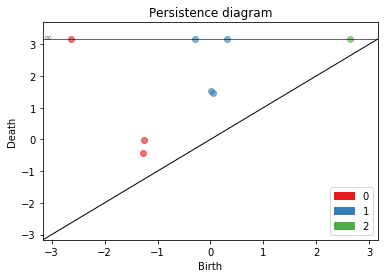

In [208]:
tile_persistence(field, [32,32])

[(2, (2.6372368210102906, inf)),
 (1, (-1.7187564164837679, inf)),
 (1, (0.05301215765068191, inf)),
 (0, (-2.649878561468273, inf)),
 (0, (-1.2672933245566997, 0.02194227722327558))]

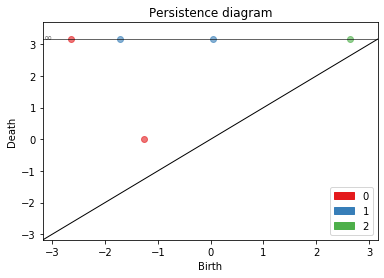

In [209]:
tile_persistence(comoving_field, [32,32])

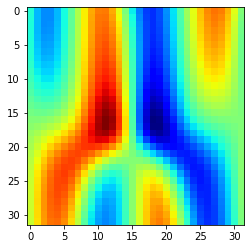

In [167]:
plt.imshow(field, cmap='jet')
plt.show()

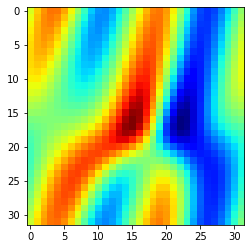

In [168]:
plt.imshow(comoving_field, cmap='jet')
plt.show()

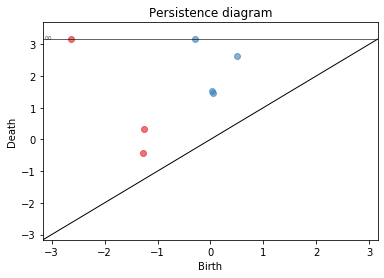

In [169]:
pcc = gudhi.PeriodicCubicalComplex(dimensions=[32, 32], top_dimensional_cells=field.ravel(), periodic_dimensions=[False, True])

merger_persistence = pcc.persistence(min_persistence=0.5)

gudhi.plot_persistence_diagram(merger_persistence)

In [170]:
merger_persistence

[(1, (-0.2952660107429462, inf)),
 (1, (0.5031653296379186, 2.635860490993602)),
 (1, (0.02865968735600349, 1.5217479417333333)),
 (1, (0.04720535461401386, 1.448814240006001)),
 (0, (-2.638726075016274, inf)),
 (0, (-1.24970911260019, 0.3223235254294187)),
 (0, (-1.2672933245566997, -0.4213317280208035))]

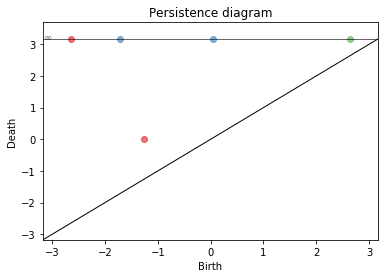

In [171]:
pcc = gudhi.PeriodicCubicalComplex(dimensions=[32, 32], 
                                   top_dimensional_cells=comoving_field.ravel(),
                                   periodic_dimensions=[True, True])

merger_persistence = pcc.persistence(min_persistence=0.1)

gudhi.plot_persistence_diagram(merger_persistence)

In [ ]:
block_field = block_Orbit.state[:16, :].ravel()
block_pcc = gudhi.PeriodicCubicalComplex(dimensions=[32, 16], top_dimensional_cells=block_field, periodic_dimensions=[False, True])
block_persistence = block_pcc.persistence(min_persistence=0.55)

[(1, (1.739181394164185, inf)),
 (1, (1.9438130254615653, 2.4971914971245157)),
 (0, (-2.497191489076226, inf)),
 (0, (-2.3571245655467714, -1.7470469119604177))]

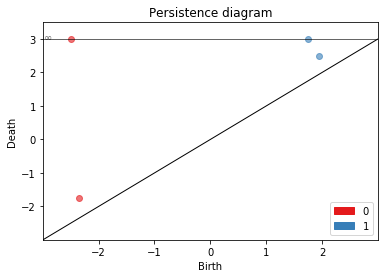

In [240]:
filename =  "C:\\Users\\matth\\Desktop\\anti_L17p5_T17.h5"

gap_Orbit = read_h5(filename)

gap_Orbit = rediscretize(gap_Orbit.convert(to='modes'), new_N=32, new_M=32).convert(to='field')

gap_Orbit = gap_Orbit.to_fundamental_domain()

tile_persistence(gap_Orbit, [16, 32], periodic_dimensions=[True, False])

In [241]:
z

In [174]:
streak_field = streak_Orbit.state.ravel()

streak_pcc = gudhi.PeriodicCubicalComplex(dimensions=[32, 32], top_dimensional_cells=streak_field, periodic_dimensions=[True, True])

streak_persistence = streak_pcc.persistence()

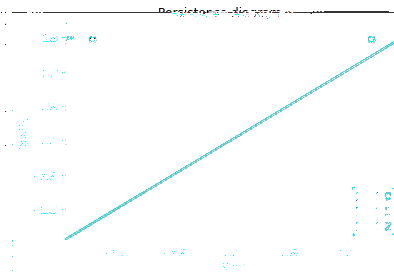

In [175]:
_ = gudhi.plot_persistence_diagram(streak_persistence, legend=True)

In [176]:
streak_field = streak_Orbit.state[-1, :].ravel()

streak_pcc = gudhi.PeriodicCubicalComplex(dimensions=[32], top_dimensional_cells=streak_field, periodic_dimensions=[True])

streak_persistence = streak_pcc.persistence()

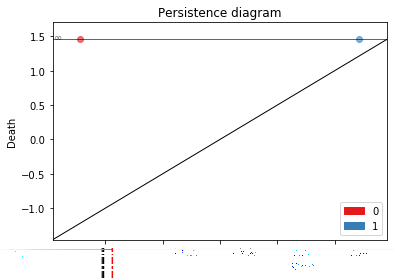

In [177]:
_ = gudhi.plot_persistence_diagram(streak_persistence, legend=True)

In [178]:
streak_persistence

[(1, (1.2166874651086423, inf)), (0, (-1.2166874651086423, inf))]

[(2, (2.3920309383515526, inf)),
 (1, (-1.6961840966965138, inf)),
 (1, (1.6955213959755964, inf)),
 (1, (-1.5223976947303153, 2.0580312355146533)),
 (1, (-0.9889191372750625, 2.13055934908452)),
 (1, (-0.35050192845447536, 0.18978797980048084)),
 (1, (1.8960240078625887, 2.284621943819365)),
 (1, (1.9620159317156434, 2.129149601124114)),
 (0, (-2.4194473521494877, inf)),
 (0, (-2.0762699784740497, 1.5388888488670656)),
 (0, (-2.1191969774178108, 0.945414155261286)),
 (0, (-0.17956962748615982, 0.3474309466032994)),
 (0, (-2.278707819421961, -1.9574489393622185))]

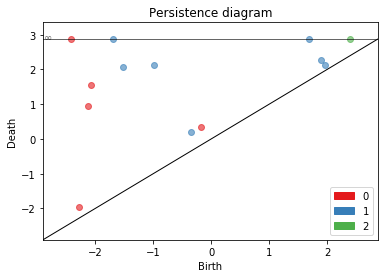

In [217]:
filename =  "C:\\Users\\matth\\Desktop\\none_000_121.h5"
block_Orbit = read_h5(filename)
block_Orbit = rediscretize(block_Orbit, new_N=32, new_M=32)
tile_persistence(block_Orbit, [32, 32])

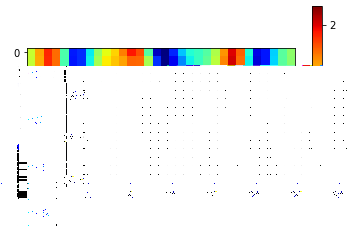

In [233]:
plt.imshow(block_Orbit.state[:16, :], cmap='jet')
_ = plt.colorbar()
_ = plt.show()

In [234]:
block_field = block_Orbit.state[:16, :].ravel()
block_pcc = gudhi.PeriodicCubicalComplex(dimensions=[32, 16], top_dimensional_cells=block_field, periodic_dimensions=[False, True])
block_persistence = block_pcc.persistence(min_persistence=0.55)

In [235]:
_ = gudhi.plot_persistence_diagram(block_persistence, legend=True)

In [229]:
block_voxel = block_Orbit.state[:16,:].copy()

In [230]:
block_voxel[block_voxel<=0]=0
block_voxel[block_voxel>0]=1

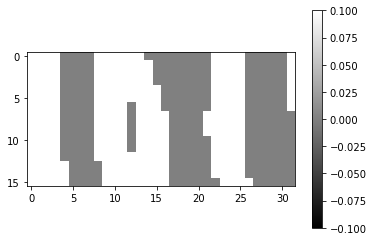

In [231]:
plt.imshow(block_voxel, cmap='gray', vmax=0)
_ = plt.colorbar()
_ = plt.show()

In [186]:
block_persistence

[(2, (2.3920309383515526, inf)),
 (1, (-1.6961840966965138, inf)),
 (1, (1.6955213959755964, inf)),
 (1, (-1.5223976947303153, 2.0580312355146533)),
 (1, (-0.9889191372750625, 2.13055934908452)),
 (0, (-2.4194473521494877, inf)),
 (0, (-2.0762699784740497, 1.5388888488670656)),
 (0, (-2.1191969774178108, 0.945414155261286))]

In [212]:
r_block_field = -1.0*np.fliplr(block_Orbit.state).ravel()
r_block_pcc = gudhi.PeriodicCubicalComplex(dimensions=[32, 32], top_dimensional_cells=r_block_field, periodic_dimensions=[True, True])
r_block_persistence = r_block_pcc.persistence(min_persistence=0.55)

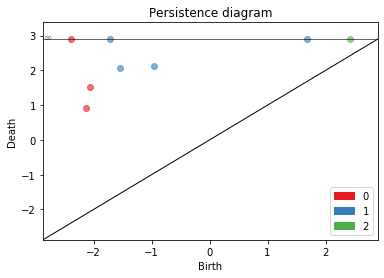

In [213]:
_ = gudhi.plot_persistence_diagram(r_block_persistence, legend=True)

[(2, (2.4194473521494877, inf)),
 (1, (-1.7139033077532213, inf)),
 (1, (1.679787660121617, inf)),
 (1, (-1.5388888488670656, 2.0762699784740497)),
 (1, (-0.9639667253455935, 2.1191969774178108)),
 (1, (-0.3529700273280944, 0.17956962748615982)),
 (1, (1.9571904882671576, 2.278707819421961)),
 (1, (2.1686026224345114, 2.2928428662226534)),
 (1, (2.020115190808304, 2.125763284994453)),
 (0, (-2.3920309383515526, inf)),
 (0, (-2.0580312355146533, 1.5123869323210093)),
 (0, (-2.13055934908452, 0.906950041347947)),
 (0, (-0.18978797980048084, 0.33827478888585294)),
 (0, (-2.284621943819365, -1.9965731100680872))]

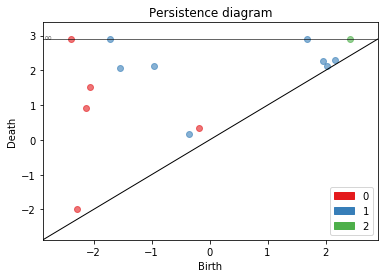

In [201]:
tile_persistence(r_block_field, [32,32])

[(2, (2.635860490993602, inf)),
 (1, (-0.2952660107429462, inf)),
 (1, (0.3223235254294187, inf)),
 (1, (0.019799897893334563, 1.5217479417333333)),
 (1, (0.04720535461401386, 1.448814240006001)),
 (0, (-2.638726075016274, inf)),
 (0, (-1.24970911260019, -0.015009193312885279)),
 (0, (-1.2672933245566997, -0.4213317280208035))]

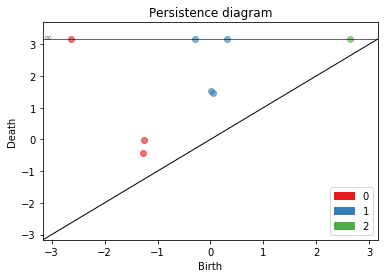

In [210]:
tile_persistence(field, [32,32])

In [207]:
plt.imshow(merger_Lmin.state, cmap='jet')

In [203]:
filename =  "C:\\Users\\matth\\Desktop\\rpo_L12p60_T58.h5"
merger_Lmin= read_h5(filename)
merger_Lmin = rediscretize(merger_Lmin, new_N=32, new_M=32)
filename =  "C:\\Users\\matth\\Desktop\\rpo_L13p09_T9.h5"
merger_Lmax = read_h5(filename)
merger_Lmax = rediscretize(merger_Lmax, new_N=32, new_M=32)

[(2, (2.1017234319180313, inf)),
 (1, (-0.055044732610278035, inf)),
 (1, (0.7822107613730267, inf)),
 (1, (-0.024122858534914395, 0.9647181287564962)),
 (0, (-2.0968654104175286, inf)),
 (0, (-0.9597196983150339, -0.7575323992248629))]

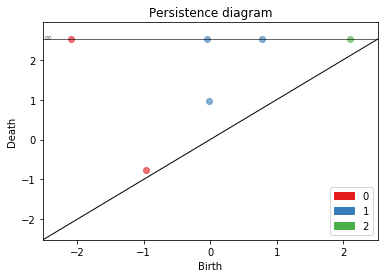

In [204]:
tile_persistence(merger_Lmin.state, [32,32])

[(2, (2.6196679009546946, inf)),
 (1, (-1.0055712092379803, inf)),
 (1, (2.221806343878458, inf)),
 (1, (-0.4280311942442415, 0.15807504417709606)),
 (0, (-2.182236579279274, inf)),
 (0, (-1.2040606059903667, -1.0688124171560403))]

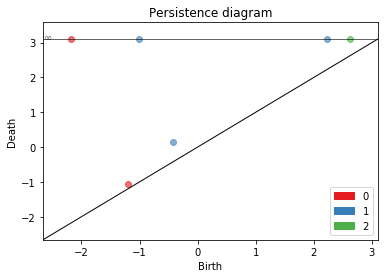

In [205]:
tile_persistence(merger_Lmax.state, [32,32])